In [1]:
import lbg_forecast.sps as sps
import lbg_forecast.sfh as sfh
import lbg_forecast.population_model as sfh
import lbg_forecast.cosmology as cosmo
import lbg_forecast.emulator as em
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sps_model=sps.initialise_sps_model(neb_em=False)
mimic = em.fsps_emulator("./")

In [62]:
redshift=np.arange(0.01, 7.0, 0.5)
phot_default = []
phot_beta = []
em1 = []
for z in redshift:
    
    pop.
    sps_params = np.array([z, 0.1, 0.5, 0.1, 0.0, 1.0, -3, 0.0, 10**-2, 10, -1.0, 0.0, 4.0, 0.0, 0.0, 1.0, 10**9])
    sps_param_resize = sps_params.reshape((1, sps_params.shape[0]))
    #em1.append(mimic.mimic_photometry(sps_param_resize, 1)[0])

    sps.update_model(sps_model, sps_params, False, sfh.default_agebins(), binscale=sfh.zred_to_agebins)
    phot_default.append(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./"))
    sps.update_model(sps_model, sps_params, False, sfh.default_agebins(), binscale=sfh.zred_to_agebins_pbeta)
    phot_beta.append(sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./"))

phot_default = np.array(phot_default)
phot_beta = np.array(phot_beta)
#em1 = np.array(em1)
print(phot_default[:, 0]-phot_beta[:, 0])

[-0.01071103 -0.01368245 -0.01384428 -0.01461472 -0.01646289 -0.01746481
  0.28100539  0.28209545  0.33055354  0.38104955  0.42899647  0.47828027
  0.53205029  0.58683703]


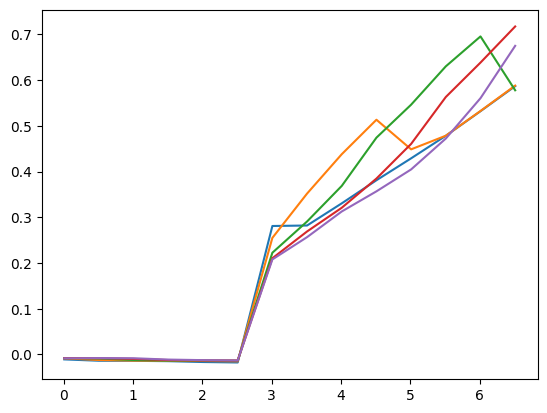

In [63]:
nbands=5
for i in range(nbands):
    diff = (phot_default-phot_beta)[:, i]
    plt.plot(redshift, diff)

#wmap1_to_9 = np.vstack((redshift, diff))
#np.savetxt("corrections/wmap1_to_9.txt", wmap1_to_9)

(23.0, 30.0)

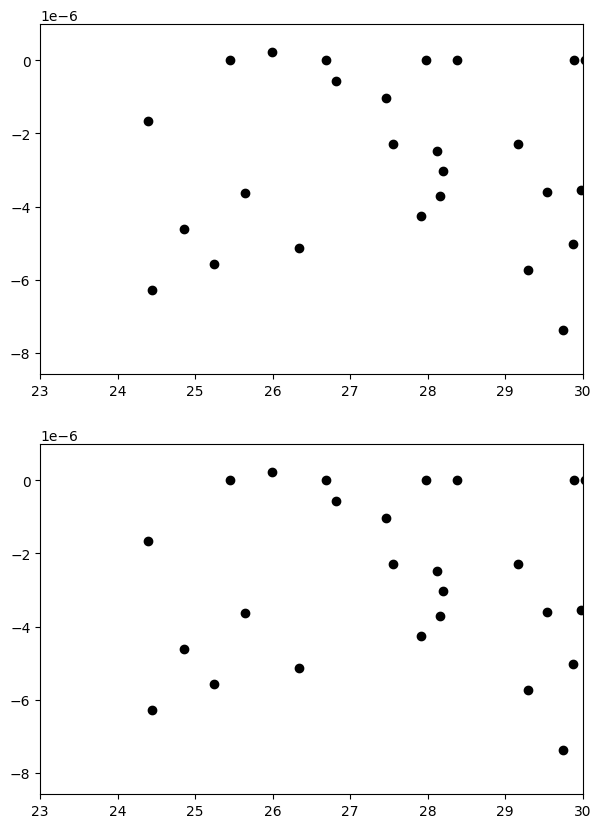

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 10))

diff = (phot9-phot1)[:, 0]


axes[0].scatter(phot9[:, 0], phot9[:, 0] - phot1[:, 0] - cosmo.wmap1_to_9(redshift), c="k")
#axes[1].plot(phot9[:, 0], phot9[:, 0] - phot1[:, 0], c="r")
axes[0].set_xlim(23, 30)
#axes[1].set_ylim(-0.01, 0.01)

#axes[2].plot(phot9[:, 0], phot9[:, 0] - em1[:, 0], c="r")
axes[1].scatter(phot9[:, 0], phot9[:, 0] - em1[:, 0] - cosmo.wmap1_to_9(redshift) - (phot1[:, 0] - em1[:, 0]), c="k")
axes[1].set_xlim(23, 30)
#axes[1].set_ylim(-0.01, 0.01)

In [6]:
sps_params = np.array([0.0153, 0.1, 0.5, 0.1, 0.0, 1.0, -3, 0.0, 10**-2, 10, -1, -1, 0, -1, -1, -1, 10**8])
sps_param_resize = sps_params.reshape((1, sps_params.shape[0]))


photem = mimic.mimic_photometry(sps_param_resize, 1)
sps.update_model(sps_model, sps_params, False, sfh.default_agebins())
photo9 = sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap9(), lya_uncertainity=False, path="./")
photo1 = sps.get_magnitudes(sps_model, filters="lsst", cosmology=cosmo.get_wmap1(), lya_uncertainity=False, path="./")

print(photem[0][0]+cosmo.wmap1_to_9(0.0153), photo1[0]+cosmo.wmap1_to_9(0.0153), photo9[0])

23.21100763964744 23.31361488035452 23.313615155318455
